In [1]:
import pyrixs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import pandas as pd

from matplotlib.ticker import MultipleLocator
from matplotlib import rc, rcParams

In [2]:
major_tick_multiple = 5
minor_tick_multiple = 1
ylabel = 'Temperature (°C)'
xlabel = 'Binding Energy (eV)'
fontsize = 12
labelpad = 5

font_family='Arial'
axes_linewidth=2.25
tick_linewidth=axes_linewidth*.9
tick_length=tick_linewidth*5

rc('font',**{'family':'sans-serif','sans-serif':[font_family]})
rc('text', usetex=False)

In [3]:
calibration_data = pd.read_csv('../calibration/channelsToEnergies++.txt', sep=r'\t', engine='python')
calibration_data = np.array(calibration_data.iloc[:,0])

[457.08569, 794.69733]


/Users/isaacz/Documents/GitHub/picklerixs/py/pyrixs.py:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


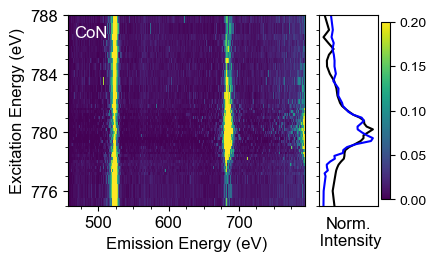

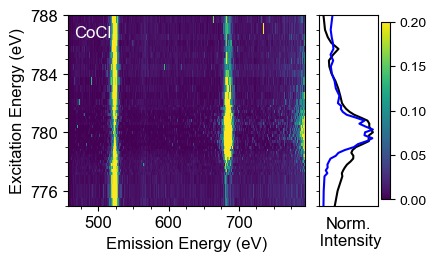

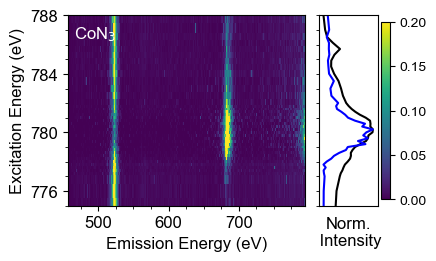

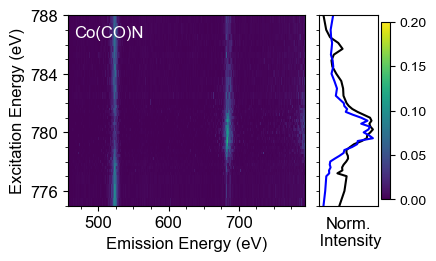

In [35]:
ipfy_lim = [395,800]
xlim = [calibration_data.min(), calibration_data.max()]
vmin=0
vmax=0.2

dim = [4.25,2.5]

print(xlim)

header_list = ['CoCl','CoN$_{3}$','CoN','Co(CO)N']

dir = '../data/irixs/2024-3-28'
dir_list, info_file_list = pyrixs.Util.bulk_data_read(dir)

rixs_list = [pyrixs.Rixs(dir_list[i], info_file_list[i], calibration_data=calibration_data) for i in [2,4,3,5]]

# rixs0 = pyrixs.Rixs(dir_list[2], info_file_list[2])
# rixs1 = pyrixs.Rixs(dir_list[4], info_file_list[4])

pyrixs.Util.replace_entries(rixs_list[0], rixs_list[1])
# pyrixs.Util.replace_entries(rixs_list[2], rixs_list[3])

rixs_list[0].plot_mrixs(show=False, plot_ipfy=True, plot_tfy=False, plot_tfy_masked=True, ipfy_lim=ipfy_lim, dim=dim, xlim=xlim, header='CoN',
                        x_minor_tick_multiple=25, vmin=vmin, vmax=vmax,
                        savefig='../fig/Co-L3-{}-full.svg'.format('CoN'))
# rixs_list[2].plot_mrixs(show=False, plot_ipfy=True, plot_tfy=False, plot_tfy_masked=True, ipfy_lim=ipfy_lim, dim=[4.5,2.5], xlim=xlim, header='Co(CO)N')

rixs_list_new = [rixs_list[0]]
# print(rixs0.df)

# for i in range(len(dir_list)):
for i in [0,1,3]:
    dir = dir_list[i]
    info_file = info_file_list[i]
    rixs = pyrixs.Rixs(dir, info_file, calibration_data=calibration_data)
    # if i == 2:
    #     izero = 'Izero 2'
    # else:
    #     izero = 'Izero'
    # if i == 2:
    #     drop = [17,19,20]
    izero = 'Izero'
    if i == 2:
        drop = [17,19]
    else:
        drop = []
    if i not in [0,1,2,3]:
        header = None
    else:
        header = header_list[i]
    rixs.plot_mrixs(show=False, plot_ipfy=True, ipfy_lim=ipfy_lim, izero=izero, drop=drop, dim=dim, xlim=xlim, header=header,
                    x_minor_tick_multiple=25, vmin=vmin,vmax=vmax,
                    savefig='../fig/Co-L3-{}-full.svg'.format(header))
    rixs_list_new.append(rixs)

/Users/isaacz/Documents/GitHub/picklerixs/py/pyrixs.py:355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rixs0.info_df["Frame #"].iloc[idx] = float(idx+1)


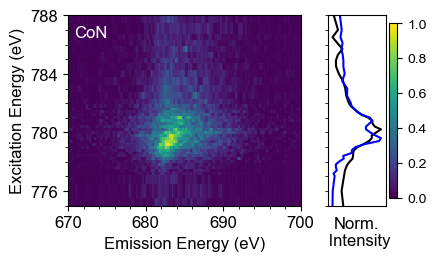

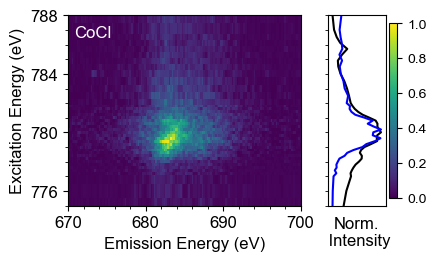

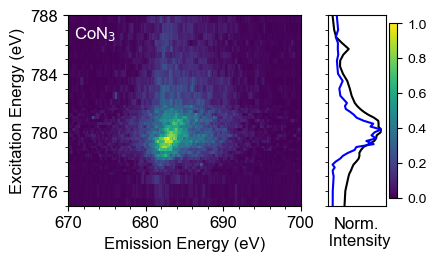

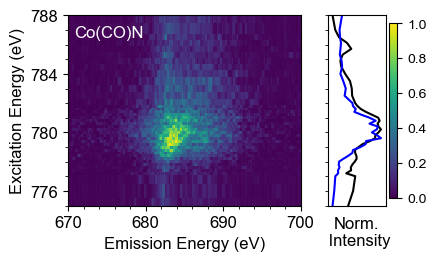

In [5]:
ipfy_lim = [395,800]
xlim = [670, 700]
x_minor_tick_multiple = 2

header_list = ['CoCl','CoN$_{3}$','CoN','Co(CO)N']

dir = '../data/irixs/2024-3-28'
dir_list, info_file_list = pyrixs.Util.bulk_data_read(dir)

rixs_list = [pyrixs.Rixs(dir_list[i], info_file_list[i], calibration_data=calibration_data) for i in [2,4,3,5]]

# rixs0 = pyrixs.Rixs(dir_list[2], info_file_list[2])
# rixs1 = pyrixs.Rixs(dir_list[4], info_file_list[4])

pyrixs.Util.replace_entries(rixs_list[0], rixs_list[1])
# pyrixs.Util.replace_entries(rixs_list[2], rixs_list[3])

rixs_list[0].plot_mrixs(show=False, plot_ipfy=True, plot_tfy=False, plot_tfy_masked=True, ipfy_lim=ipfy_lim, dim=dim, xlim=xlim, header='CoN',
                        x_minor_tick_multiple=x_minor_tick_multiple,
                        savefig='../fig/Co-L3-{}-zoomed.svg'.format('CoN'))
# rixs_list[2].plot_mrixs(show=False, plot_ipfy=True, plot_tfy=False, plot_tfy_masked=True, ipfy_lim=ipfy_lim, dim=[4.5,2.5], xlim=xlim, header='Co(CO)N')

rixs_list_new = [rixs_list[0]]
# print(rixs0.df)

# for i in range(len(dir_list)):
for i in [0,1,3]:
    dir = dir_list[i]
    info_file = info_file_list[i]
    rixs = pyrixs.Rixs(dir, info_file, calibration_data=calibration_data)
    # if i == 2:
    #     izero = 'Izero 2'
    # else:
    #     izero = 'Izero'
    # if i == 2:
    #     drop = [17,19,20]
    izero = 'Izero'
    if i == 2:
        drop = [17,19]
    else:
        drop = []
    if i not in [0,1,2,3]:
        header = None
    else:
        header = header_list[i]
    rixs.plot_mrixs(show=False, plot_ipfy=True, ipfy_lim=ipfy_lim, izero=izero, drop=drop, dim=dim, xlim=xlim, header=header,
                    x_minor_tick_multiple=x_minor_tick_multiple,
                    savefig='../fig/Co-L3-{}-zoomed.svg'.format(header))
    rixs_list_new.append(rixs)

In [16]:
co_xas = pyrixs.Xas(
    '../data/xas/2024-3-28',
    [74320],
    skiprows=15
)
print(co_xas.df)

    Time (s)  Mono Energy  Undulator Gap  Mono Energy.1  Mono Energy Goal  \
0   1127.218   769.989927            0.0            0.0               0.0   
1      4.219   770.508721            0.0            0.0               0.0   
2      8.516   770.997114            0.0            0.0               0.0   
3     13.048   771.508369            0.0            0.0               0.0   
4     18.157   772.020303            0.0            0.0               0.0   
..       ...          ...            ...            ...               ...   
66   322.922   803.003433            0.0            0.0               0.0   
67   327.923   803.538732            0.0            0.0               0.0   
68   332.736   804.007101            0.0            0.0               0.0   
69   338.375   804.500201            0.0            0.0               0.0   
70   341.998   805.008437            0.0            0.0               0.0   

    Beam Current  Storage Ring Energy  Gate  Counter 0  Counter 1  Counter 

(<Figure size 325x325 with 1 Axes>,
 <AxesSubplot:xlabel='Excitation Energy (eV)', ylabel='Intensity (a.u.)'>)

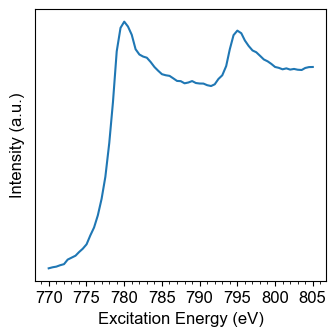

In [17]:
co_xas.plot()

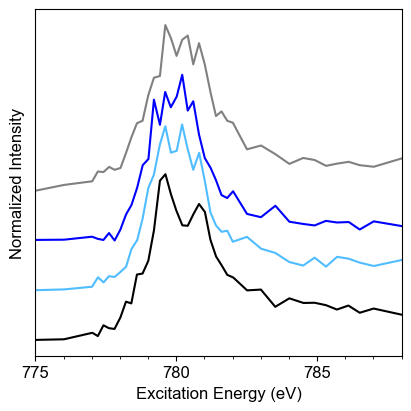

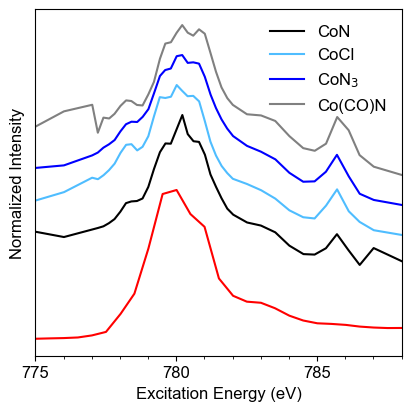

In [31]:
def opts(fig, ax):
    fontsize=12
    fig.set_size_inches(*[4,4])
    ax.set_xlabel('Excitation Energy (eV)', fontsize=fontsize)
    ax.set_ylabel('Normalized Intensity', fontsize=fontsize)
    ax.set_yticks([])
    ax.tick_params(labelsize=fontsize)
    
    x_minor_tick_multiple = 1
    x_major_tick_multiple = 5
    
    if x_minor_tick_multiple:
        ax.xaxis.set_minor_locator(MultipleLocator(x_minor_tick_multiple))
    if x_major_tick_multiple:
        ax.xaxis.set_major_locator(MultipleLocator(x_major_tick_multiple))

colors = [
    'black',
    "#4fbdff",
    "#0000ff",
    "#808080"
]

fig, ax = plt.subplots(layout='constrained')

i = 0
for rixs in rixs_list_new:
    ax.plot(rixs.y, rixs.ipfy+0.3*i, color=colors[i])
    i += 1
# ax.legend(['CoN','CoCl','CoN$_3$','Co(CO)N'], fontsize=12)
opts(fig, ax)

# co_xas.plot(fig=fig, ax=ax, color='red', y='TFY')
ax.set_xlim([775,788])
fig.savefig('../fig/XAS-Co-L3-iPFY.svg')


i = 0    
fig, ax = plt.subplots(layout='constrained')
for rixs in rixs_list_new:
    if i == 0:
        ax.plot(rixs.y_masked, rixs.tfy+0.2*i, color=colors[i])
    else:
        ax.plot(rixs.y, rixs.tfy+0.2*i, color=colors[i])
    i += 1

co_xas.plot(fig=fig, ax=ax, color='red', y='TEY', offset=-0.5)
ax.set_xlim([775,788])
    
ax.legend(['CoN','CoCl','CoN$_3$','Co(CO)N'], fontsize=12, frameon=False)
opts(fig, ax)
fig.savefig('../fig/XAS-Co-L3-TFY.svg')

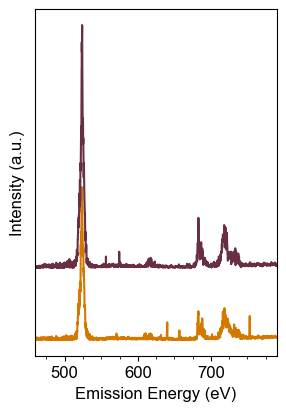

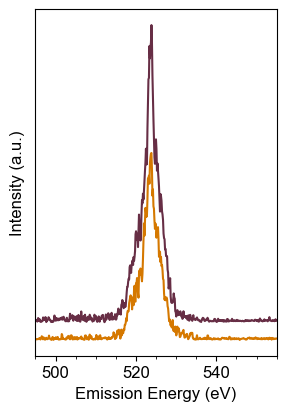

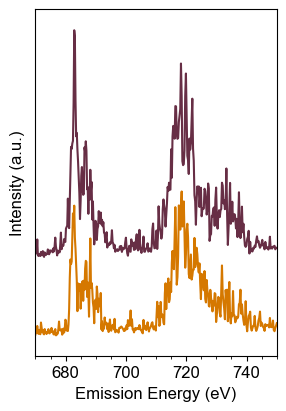

In [7]:
# dir = '../data/irixs/2024-3-28'
# dir_list, info_file_list = pyrixs.Util.bulk_data_read(dir)
# print(dir_list)
# idx = [i for i, s in enumerate(dir_list) if '16499' in s]
# print(idx)

idx = [-5, -4]

xlim_list = [
    [460,790],
    [495,555],
    [670,750]
]

ylim_list = [
    None,
    None,
    [-300,5000]
]

color_list = [
    "#D57800",
    "#672E45"
]

offset_list = [
    [0, 5000],
    [0, 1000],
    [0, 1200]
]

mintm_list = [25, 5, 5]
majtm_list = [100, 20, 20]

samples = ['FePCN-224Ac', 'Fe(NO)PCN-224Ac']
regions = ['survey','O-K','Fe-L3']

for j in range(len(xlim_list)):
    xlim = xlim_list[j]
    ylim = ylim_list[j]
    fig, ax = plt.subplots(layout='constrained')
    
    k = 0
    for i in idx:
        dir = dir_list[i]
        info_file = info_file_list[i]
        rixs = pyrixs.Rixs(dir, info_file, calibration_data=calibration_data)
        rixs.plot_xes(fig=fig, ax=ax, idx=1, xlim=xlim, ylim=ylim, color=color_list[k], offset=offset_list[j][k],
                      savefig=None, x_minor_tick_multiple=mintm_list[j], x_major_tick_multiple=majtm_list[j],
                      dim=[2.75,4])
        k += 1
    fig.savefig('../fig/XES-FePCN-224Ac-{}.svg'.format(regions[j]))

In [8]:
sample_list = ['CoCl','CoN3','CoN','Co(CO)N','CoNCO']
id_list = [ 
    [74356,74357], 
    [74349,74350,74350], 
    [74351],
    [74352,74353],
    [74354],
    [74356, 74357]
]

In [9]:
xas_dict = {}
xas_list = []
for i in range(len(sample_list)):
    xas = pyrixs.Xas(
        '../data/xas/2024-3-28',
        id_list[i]
    )
    xas_list.append(xas)

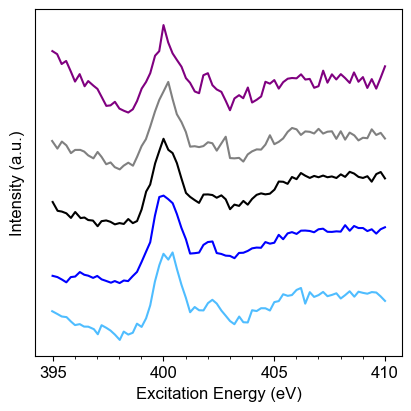

In [10]:
fig, ax = plt.subplots(layout='constrained')
color_list = [
    "#4fbdff",
    "#0000ff",
    'black',
    "#808080",
    'purple'
]
for i in range(len(xas_list)):
    xas_list[i].plot(y='TFY', fig=fig, ax=ax, offset=0.65*i, color=color_list[i], plot_opts_kwargs={'dim': [4,4]})
    # ax.legend(sample_list, frameon=False)
    # ax.text(0.025, 0.95, sample_list[i],
    #             verticalalignment='top',
    #             horizontalalignment='left',
    #             transform=ax.transAxes,
    #             fontsize=12,
    #             color='black')
fig.savefig('../fig/XAS-NK-TFY.svg')

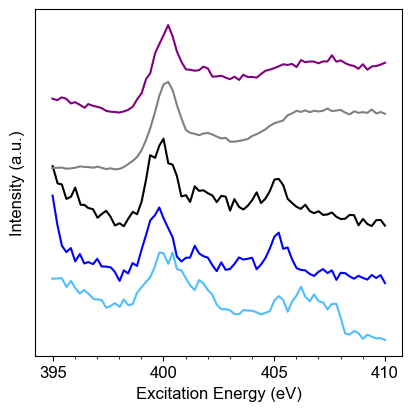

In [11]:
fig, ax = plt.subplots(layout='constrained')
color_list = [
    "#4fbdff",
    "#0000ff",
    'black',
    "#808080",
    'purple'
]
for i in range(len(xas_list)):
    xas_list[i].plot(y='TEY', fig=fig, ax=ax, offset=0.65*i, color=color_list[i], plot_opts_kwargs={'dim': [4,4]})
    # ax.legend(sample_list, frameon=False)
    # ax.text(0.025, 0.95, sample_list[i],
    #             verticalalignment='top',
    #             horizontalalignment='left',
    #             transform=ax.transAxes,
    #             fontsize=12,
    #             color='black')
fig.savefig('../fig/XAS-NK-TEY.svg')